# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/terrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


In [4]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [5]:
len(X), size(X)

(1000, 2000)

In [6]:
len(y), size(y)

(1000, 1000)

In [7]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

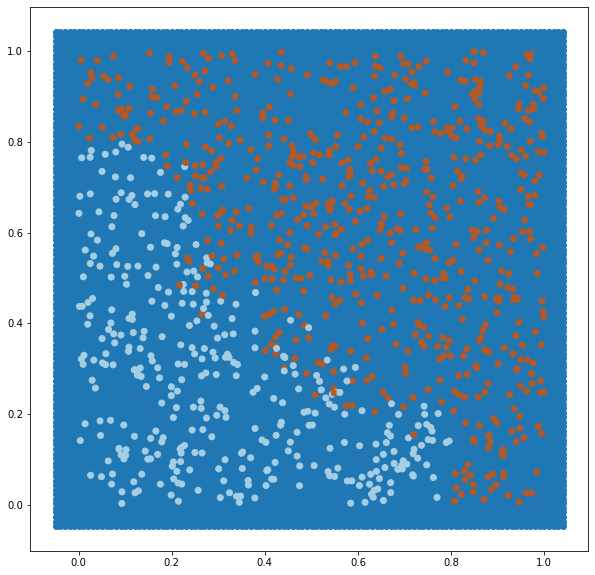

In [7]:
draw(None,X,y,0.01)

## LOGISTIC REGRESSION

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression()

In [10]:
clf.fit(X,y)

LogisticRegression()

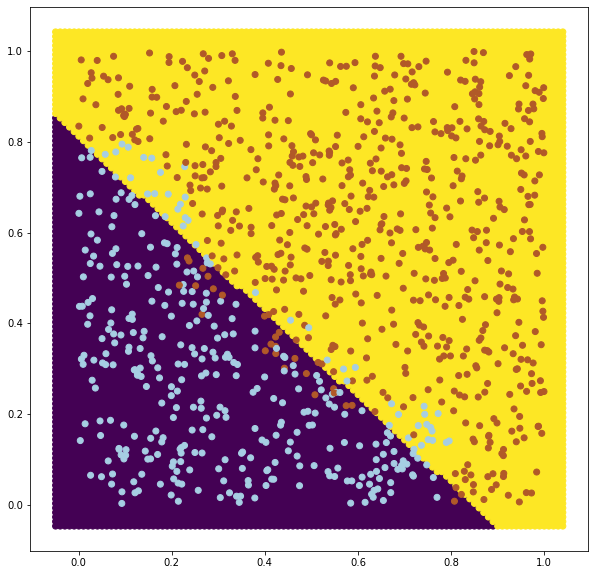

In [11]:
draw(clf,X,y,0.01)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring="accuracy")

array([0.905, 0.93 , 0.945, 0.935, 0.93 ])

In [12]:
cross_val_score(clf,X,y,scoring="accuracy").mean()

0.9289999999999999

In [37]:
#PRUEBA CON NORMALIZACIÓN

In [23]:
from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()
X_norm = normalize.fit_transform(X) #Se normaliza todo el set de datos
X_norm

array([[ 0.44100011, -1.41058561],
       [-1.69479707,  0.65918495],
       [-0.82569714,  0.16068822],
       ...,
       [-0.2404756 ,  0.6127703 ],
       [ 1.52252639, -0.62934408],
       [ 1.19192802, -0.69606481]])

In [38]:
clf_norm = LogisticRegression()
clf_norm.fit(X_norm,y)

LogisticRegression()

In [41]:
cross_val_score(clf_norm,X_norm,y,scoring="accuracy").mean()

0.9270000000000002

In [42]:
cross_val_score(clf,X_norm,y,scoring="accuracy").mean()

0.9270000000000002

In [43]:
cross_val_score(clf_norm,X,y,scoring="accuracy").mean()

0.9289999999999999

In [44]:
cross_val_score(clf,X,y,scoring="accuracy").mean()

0.9289999999999999

In [73]:
#VAMOS A HACER AHORA UN MODELO SIN NORMALIZAR Y SIN USAR CROSS-VALIDATION

In [48]:
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

len(X_train), size(X_train)

(750, 1500)

In [49]:
X_train

array([[0.60913101, 0.06082541],
       [0.93366846, 0.33304071],
       [0.53929609, 0.77683562],
       ...,
       [0.199217  , 0.41584562],
       [0.75626883, 0.17051206],
       [0.2213672 , 0.27564973]])

In [51]:
clf_1 = LogisticRegression()
clf_1.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred = clf_1.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.924

In [64]:
#PROBAMOS A SEPARAR PRIMERO Y NORMALIZAR DESPUÉS LOS SETS POR SEPARADO

In [56]:
X_train_norm = normalize.fit_transform(X_train) #Se normaliza solo el set train
X_train_norm

array([[ 0.33011918, -1.53282315],
       [ 1.46733057, -0.57376855],
       [ 0.08541072,  0.98978632],
       ...,
       [-1.1062601 , -0.28203465],
       [ 0.8457047 , -1.14638091],
       [-1.02864361, -0.77596542]])

In [67]:
X_test_norm = normalize.fit_transform(X_test) #Se normaliza solo el set test
X_test_norm

array([[ 1.51538415,  0.79396311],
       [-0.81082376,  0.86065241],
       [-0.23750981, -1.15892497],
       [ 1.2779366 , -1.26179297],
       [ 0.16219494,  0.31909179],
       [ 0.49059324,  0.99039501],
       [ 1.10445698, -0.17914316],
       [ 0.18986529, -0.20090767],
       [-0.93554497,  0.87720818],
       [-1.38289004,  1.23684293],
       [-0.29374818, -0.29130676],
       [-0.45849406,  0.31920483],
       [-0.8224978 , -1.04956101],
       [-0.56872163, -0.23470485],
       [ 0.51894608, -1.51461335],
       [ 0.76254607,  0.2114455 ],
       [ 1.43435964,  0.17766191],
       [-0.93091936,  1.01918842],
       [ 0.42678447, -0.79900603],
       [-0.33255333,  1.65466307],
       [-1.15661575,  0.45990855],
       [ 0.8074229 ,  0.82602922],
       [-1.34905361,  1.30070242],
       [ 0.35159002,  0.23456672],
       [-1.14082903, -1.41160348],
       [ 1.17971251,  0.89474159],
       [ 1.03936131,  0.23468523],
       [-0.88842361, -0.13488148],
       [-0.99316681,

In [57]:
clf_1_train = LogisticRegression()
clf_1_train.fit(X_train_norm,y_train)

LogisticRegression()

In [62]:
y_pred = clf_1_train.predict(X_test_norm)

In [63]:
accuracy_score(y_test,y_pred)

0.92

In [65]:
#PROBAMOS A SEPARAR PRIMERO, NORMALIZAR SOLO EL SET TRAIN Y LUEGO APLICAR ESA NORMALIZACIÓN AL SET TEST

In [66]:
X_train_norm = normalize.fit_transform(X_train) #Se normaliza solo el set train
X_test_norm_train = normalize.transform(X_test) #Se ajusta el set test con el ajuste hecho en train
X_test_norm_train

array([[ 1.52988948,  0.83012385],
       [-0.86935431,  0.89624193],
       [-0.27804003, -1.10603709],
       [ 1.2849868 , -1.20802399],
       [ 0.13421424,  0.35931996],
       [ 0.47292325,  1.02487324],
       [ 1.10606045, -0.13464744],
       [ 0.16275335, -0.15622553],
       [-0.99799139,  0.9126559 ],
       [-1.45938174,  1.26921025],
       [-0.33604412, -0.24585032],
       [-0.50596252,  0.35943204],
       [-0.88139488, -0.99760987],
       [-0.6196509 , -0.18973323],
       [ 0.50216628, -1.45867887],
       [ 0.75341457,  0.2525957 ],
       [ 1.44632105,  0.21910147],
       [-0.99322055,  1.05342003],
       [ 0.40711108, -0.74920098],
       [-0.37606763,  1.68345163],
       [-1.22600312,  0.49893057],
       [ 0.7997004 ,  0.8619153 ],
       [-1.42448294,  1.33252276],
       [ 0.32955574,  0.27551887],
       [-1.20972074, -1.35655133],
       [ 1.18367877,  0.93003913],
       [ 1.03892097,  0.27563637],
       [-0.94939056, -0.09076488],
       [-1.05742238,

In [68]:
clf_2_train = LogisticRegression()
clf_2_train.fit(X_train_norm,y_train)

LogisticRegression()

In [69]:
y_pred = clf_2_train.predict(X_test_norm_train)

In [70]:
accuracy_score(y_test,y_pred)

0.916

In [75]:
#POR ÚLTIMO NORMALIZADOS TODO EL SET DE DATOS Y LUEGO DIVIDIMOS Y CORREMOS LOS MODELOS

In [76]:
X_norm

array([[ 0.44100011, -1.41058561],
       [-1.69479707,  0.65918495],
       [-0.82569714,  0.16068822],
       ...,
       [-0.2404756 ,  0.6127703 ],
       [ 1.52252639, -0.62934408],
       [ 1.19192802, -0.69606481]])

In [77]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y)

In [79]:
clf_train_norm = LogisticRegression()
clf_train_norm.fit(X_train_norm,y_train)

LogisticRegression()

In [82]:
y_pred = clf_train_norm.predict(X_test_norm)

In [83]:
accuracy_score(y_test,y_pred)

0.952

In [13]:
#Este es el mejor valor porque se está usando en el X información que NO pertenece al X_train y sí al X_test,
#por eso funciona bien, pero es irreal ya que está usando información fuera de sus datos originales, lo que no es 
#lícito.

## K NEIGHBORS CLASSIFIER

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
clf_gk = GridSearchCV(KNeighborsClassifier(),
                   param_grid={"n_neighbors":np.arange(1,100)},
                   scoring="accuracy")
clf_gk.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [18]:
clf_gk.best_params_

{'n_neighbors': 16}

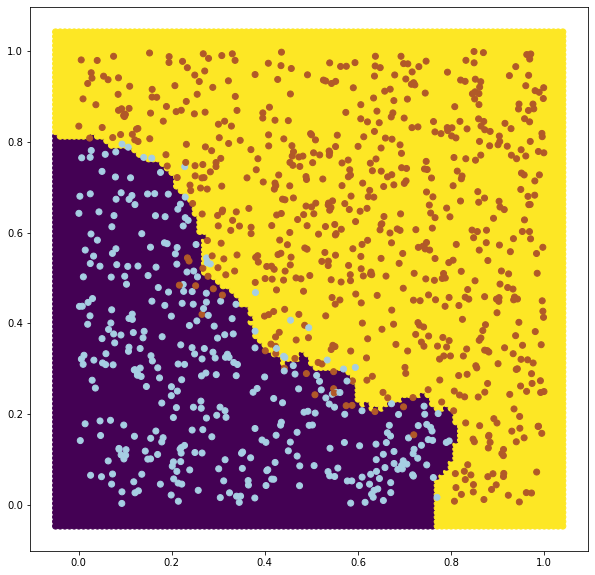

In [19]:
draw(clf_gk.best_estimator_,X,y,0.01)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

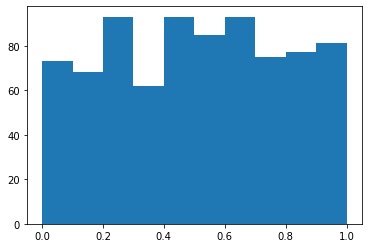

In [21]:
plt.hist(X_train[:,0]);

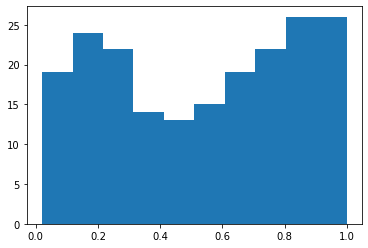

In [22]:
#Vemos que son bastante distintos los datos en el set train y en test.
plt.hist(X_test[:,0]);

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
confusion_matrix(y_test,clf_gk.predict(X_test))

array([[ 70,   4],
       [  3, 123]])

In [25]:
print(classification_report(y_test,clf_gk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        74
         1.0       0.97      0.98      0.97       126

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [26]:
from sklearn.metrics import precision_score
precision_score(y_test,clf_gk.predict(X_test),labels=[1])

0.968503937007874

In [27]:
#Creamos una métrica que coloca todos los puntos azules en un mismo lado, por contra, comete bastantes errores con
#los puntos marrones.

from sklearn.metrics import make_scorer

def prec_fast(y_test,pred):
    return sum(y_test[pred==1])/len(y_test[pred==1])

clf_gk = GridSearchCV(KNeighborsClassifier(),
                   param_grid={"n_neighbors":np.arange(1,100)},
                   scoring=make_scorer(prec_fast))
clf_gk.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring=make_scorer(prec_fast))

In [28]:
clf_gk.best_estimator_

KNeighborsClassifier(n_neighbors=2)

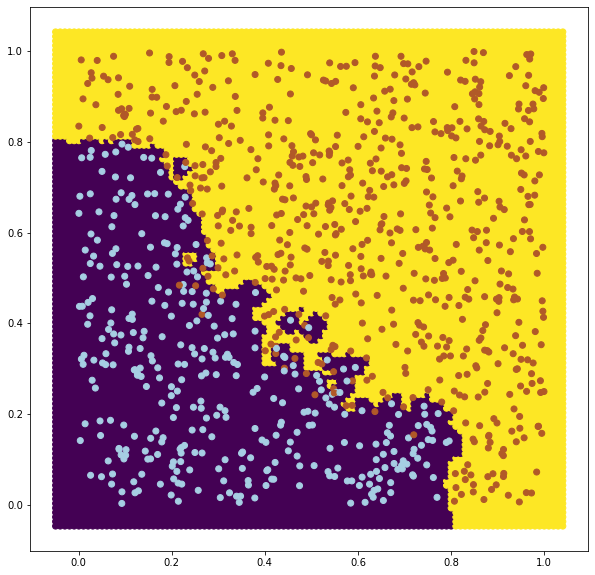

In [29]:
draw(clf_gk.best_estimator_,X,y,0.01)

## SUPPORT VECTOR MACHINE - SVM

In [30]:
from sklearn.svm import SVC

In [ ]:
# clf = SVC(kernel="linear", C=[.1,1,10,100])
# Dibujais
# clf = SVC(kernel="rbf", C=[...], gamma=[1,10,100])
# Dibujais
# clf = SVC(kernel="poly", C=[...],degree=[2,3])
# Dibujais

In [31]:
clf_gsl = GridSearchCV(SVC(kernel="linear"),
                       param_grid={"C":[0.1,1,10,100,1000]},
                       scoring="accuracy")
clf_gsl.fit(X,y)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [32]:
clf_gsl.best_estimator_

SVC(C=100, kernel='linear')

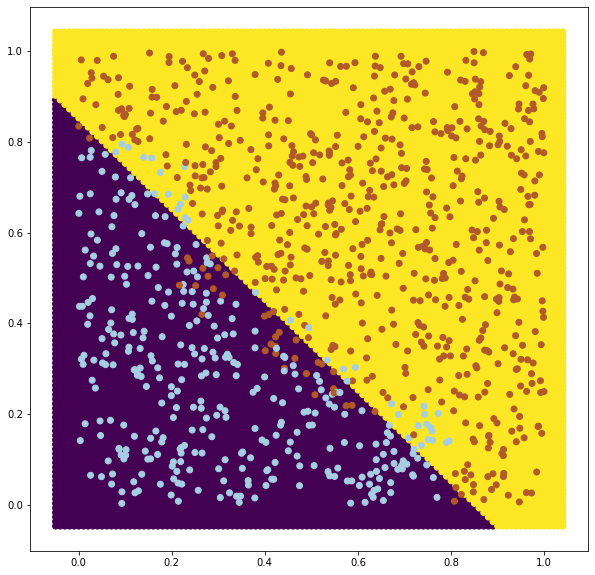

In [33]:
draw(clf_gsl.best_estimator_,X,y,0.01)

In [34]:
clf_gsr = GridSearchCV(SVC(kernel="rbf"),
                       param_grid={"C":[.1,1,10,100,1000],"gamma":[1,10,100]},
                       scoring="accuracy")
clf_gsr.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 10, 100]},
             scoring='accuracy')

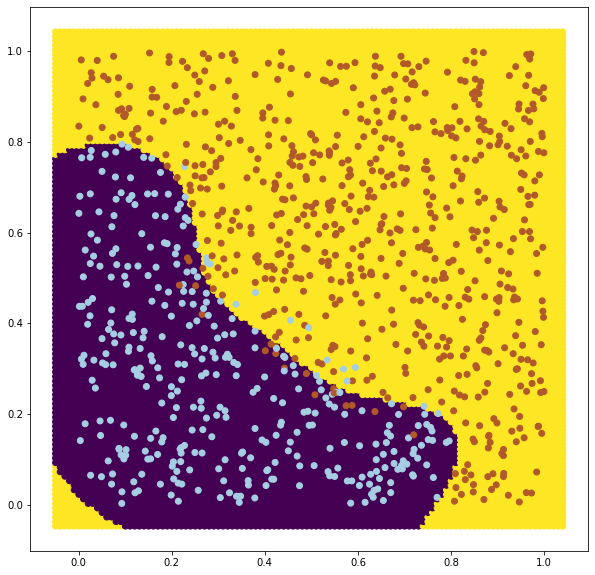

In [35]:
draw(clf_gsr.best_estimator_,X,y,0.01)

In [36]:
clf_gsp = GridSearchCV(SVC(kernel="poly"),
                       param_grid={"C":[.1,1,10,100,1000],"degree":[2,3,4]},
                       scoring="accuracy")
clf_gsp.fit(X,y)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4]},
             scoring='accuracy')

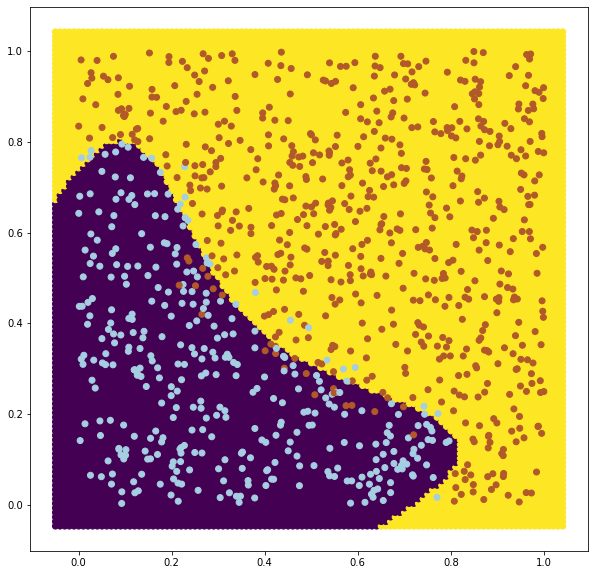

In [66]:
draw(clf_gsp.best_estimator_,X,y,0.01)

In [37]:
print(clf_gsl.best_score_)
print(clf_gsr.best_score_)
print(clf_gsp.best_score_)

0.929
0.958
0.9530000000000001


In [ ]:
#DECISION TREES

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf_gd = GridSearchCV(DecisionTreeClassifier(),
                       param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                       scoring="accuracy")
clf_gd.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='accuracy')

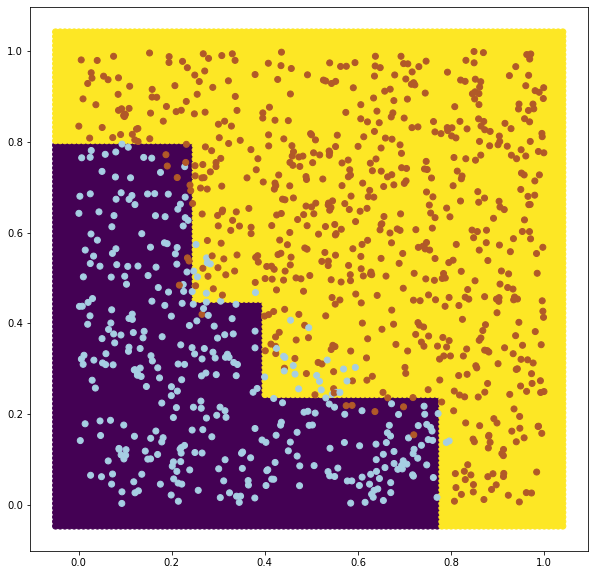

In [40]:
draw(clf_gd.best_estimator_,X,y,0.01)

In [41]:
#Se puede hacer una máscara considerando la probabilidad que acertar un determinado ratio, en este caso 0.2.
clf_gd.best_estimator_.predict_proba(X_test)[:,0]>.2

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True, False,

In [50]:
clf_gd.best_score_

0.9419999999999998

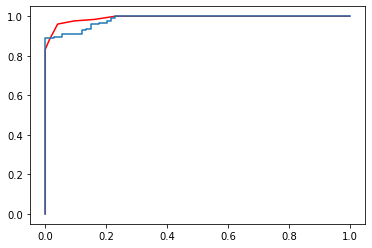

In [82]:
from sklearn.metrics import roc_curve
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_gd.best_estimator_.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp,c="red")
fp,tp,_ = roc_curve(y_test,clf.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)

In [42]:
###########################################################################################################
# R A N D O M     F O R E S T

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
from tqdm import tqdm_notebook as tqdm

In [46]:
#Prueba de funcionamiento "tqdm"

for i in tqdm(np.arange(1000)):
  (i+i)

<ipython-input-46-11b5b1cddce4>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(np.arange(1000)):


In [60]:
clf_gr = GridSearchCV(RandomForestClassifier(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="accuracy")
clf_gr.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='accuracy')

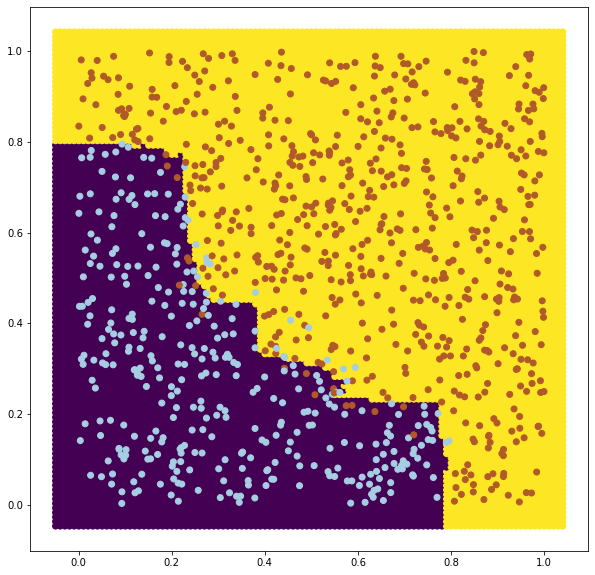

In [48]:
draw(clf_gr.best_estimator_,X,y,0.01)

In [61]:
clf_gr.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=10)

In [62]:
clf_gr.best_score_

0.952

In [63]:
#GRADIENT BOOSTER TREES

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
clf_gg = GridSearchCV(GradientBoostingClassifier(learning_rate=.1),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="accuracy")
clf_gg.fit(X,y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='accuracy')

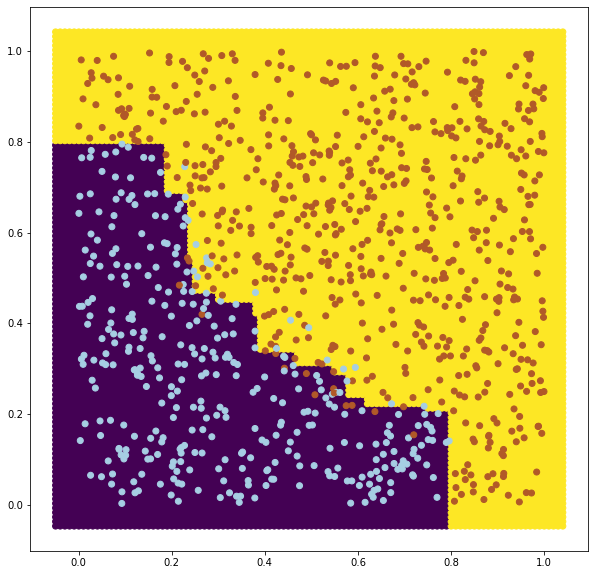

In [66]:
draw(clf_gg.best_estimator_,X,y,0.01)

In [68]:
print(clf_gg.best_score_)
print(clf_gr.best_score_)

0.952
0.952


In [69]:
clf_gr.best_estimator_.feature_importances_

array([0.48113434, 0.51886566])